#### Digital Signal Processing Courseware: An Introduction (copyright © 2024)
## Authors: J. Christopher Edgar and Gregory A. Miller

Originally written in Mathematica by J. Christopher Edgar. Conversion to Jupyter Notebook by Song Liu.

The authors of this courseware are indebted to Prof. Bruce Carpenter (University of Illinois Urbana-Champaign). Bruce inspired the creation of this courseware, he consulted with the authors as this courseware was being developed, and he provided the original version of the code and text for several sections of this courseware (e.g. the section on complex numbers and the section on normal distributions). 

# <font color=red>DSP.05 Computing Magnitude and Phase</font>

# <font color=red>Give it a Try!</font>
# <font color=red>Part 4</font>

### Setup

In [1]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as img
from matplotlib import cm
from mpl_toolkits import mplot3d
from scipy.fft import fft, fftfreq
import matplotlib.patches as patches
import math
import cmath
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Figure size and general parameters
plt.rc("figure", figsize=(8, 6))

#function to create time course figure
#one waveform
def make_plot_1(x1,y1,type="b"): 
    plt.plot(x1, y1,type)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#two overlaid waveforms with red and blue   
def make_plot_2(x1,y1,type1,x2,y2,type2): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#three overlaid waveforms with red, blue and green   
def make_plot_3(x1,y1,type1,x2,y2,type2,x3,y3,type3): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.plot(x3, y3, type3)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
def make_plot_3d(ax,x,y,z):    
    ax.contour3D(x, y, z, 50, cmap=cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
def make_plot_freq_1(x1,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf = fft(x1)
    xf = fftfreq(N, 1 / sample_rate)
    yf = yf[0:Nhalf]
    xf = xf[0:Nhalf]
    plt.plot(xf, np.abs(yf))
    
#two spectrums
def make_plot_freq_2(x1,x2,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf1 = fft(x1)
    yf2 = fft(x2)
    xf = fftfreq(N, 1 / sample_rate)

    yf1 = yf1[0:Nhalf]
    yf2 = yf2[0:Nhalf]
    xf = xf[0:Nhalf]

    plt.plot(xf, np.abs(yf1))
    plt.plot(xf, np.abs(yf2), color = 'r')
    
def make_imshow(x):
    plt.imshow(x,cmap='Greys_r')
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def make_imshow_color(x):
    plt.imshow(x)
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def round_complex(x):
    return complex(np.round(x.real,4),np.round(x.imag,4))

## <font color=red>DSP.05.G4) Obtaining Magnitude and Phase Measures from a Digitized Timeseries</font>

### <font color=red>DSP.05.G4.a) Obtaining Magnitude and Phase Measures from a Digitized Timeseries</font>

More often than not, we are working with a discrete signal (i.e., activity sampled across time).

Create a 30 Hz timeseries, 1 second in length, digitized at 400 Hz.

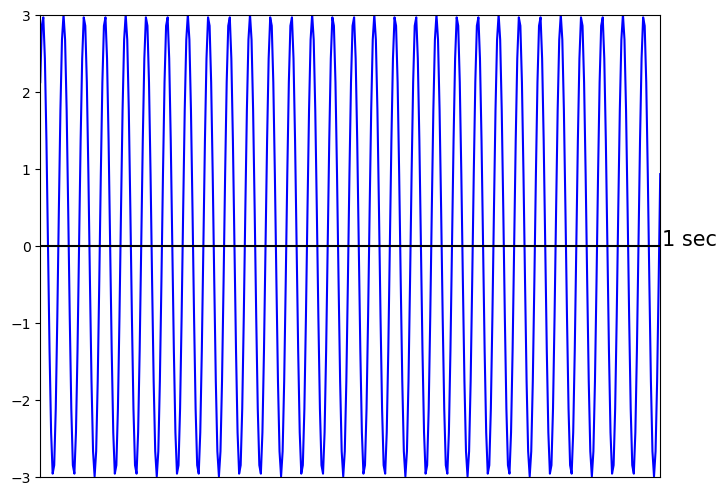

In [4]:
time = np.arange(0,1,1/400)
freq = 30
timeseries = 3*np.sin(2*np.pi * freq * time+np.pi/4)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

This timeseries is represented with 400 datapoints over a 1 second period. As a result, the timeseries
completes 30 full periods over 400 samples.

Calculate how often a datapoint is collected.

In [5]:
1/400

0.0025

A datapoint is collected every 0.0025 seconds (= every 2.5 milliseconds).

Use complex exponentials to compute the magnitude and phase of the 30 Hz activity composing the
timeseries.

### <font color=red>DSP.05.G4.b) Obtaining Magnitude and Phase Measures from a Digitized Timeseries</font>

Create a 50 Hz timeseries, 1 second in length, digitized at 250 Hz.

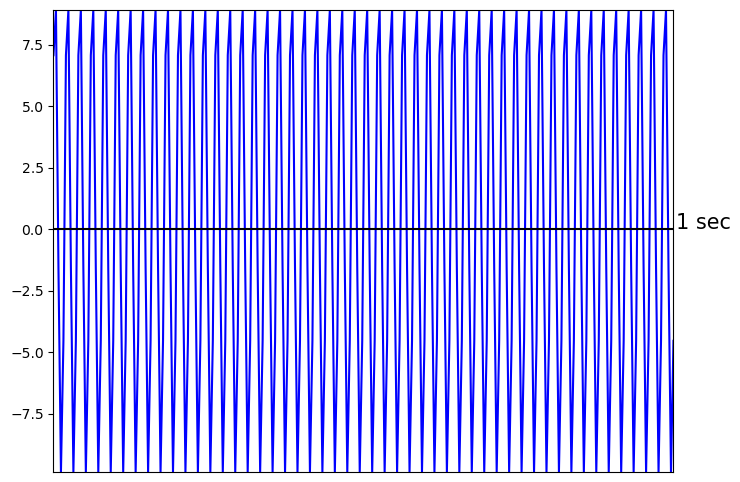

In [7]:
time = np.arange(0,1,1/250)
freq = 50
timeseries = 10*np.sin(2*np.pi * freq * time+np.pi/4)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Use complex exponentials to compute the magnitude and phase of 50 Hz activity.

### <font color=red>DSP.05.G4.c) Obtaining Magnitude and Phase Measures from a Digitized Timeseries</font>

Create a 500 Hz timeseries, 1 second in length, digitized at 1100 Hz.

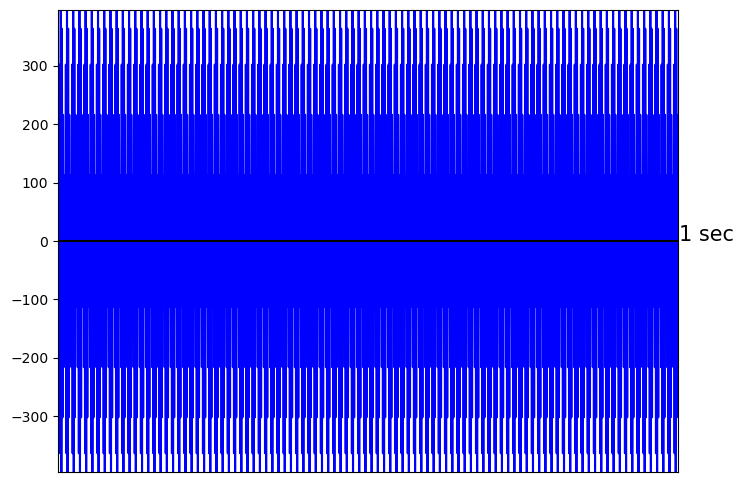

In [8]:
time = np.arange(0,1,1/1100)
freq = 500
timeseries = 400*np.sin(2*np.pi * freq * time + 2 * np.pi)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Use complex exponentials to compute the magnitude and phase of the 500 Hz activity composing the
timeseries.

### <font color=red>DSP.05.G4.d) Obtaining Magnitude and Phase Measures from a Digitized Timeseries</font>

This is a somewhat tricky example.

Create a 100 Hz timeseries (with gain of 20), 1 second in length, digitized at 150 Hz.

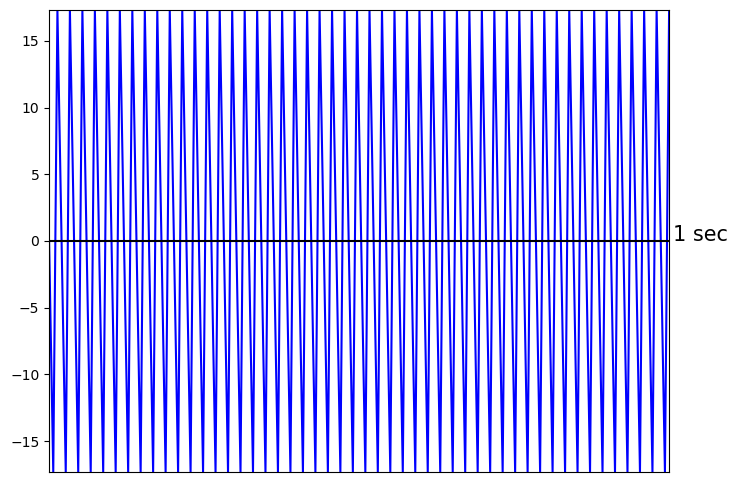

In [9]:
time = np.arange(0,1,1/150)
freq = 100
timeseries = 20*np.sin(2*np.pi * freq * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Use complex exponentials to compute the magnitude and phase of the 100 Hz activity composing the
timeseries.

### <font color=red>DSP.05.G4.e) Obtaining Magnitude and Phase Measures from a Digitized Timeseries</font>

Stay with the above problem. If you did everything correctly you obtained the correct magnitude value.
However, what problem did you notice? Create a frequency spectrum plot to demonstrate the problem.</font>